# Data Science Unit 1 Sprint Challenge 1

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 1 - Load and Explore the Data

Run the cell below to load the datasets into three dataframes and then follow the instructions below


In [143]:
import pandas as pd 

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/countries-etc-datapoints/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

Check for missing/null values in the three dataframes

In [144]:
### YOUR CODE HERE ###
# for cell_phones find the missing/null values:
cell_phones.isnull().sum()

# # Displaying data for my insight
# cell_phones

geo                  0
time                 0
cell_phones_total    0
dtype: int64

In [145]:
### YOUR CODE HERE ###
# Finding missing/null values in population data frame
population.isnull().sum()

# # Displaying data for my insight
# population

geo                 0
time                0
population_total    0
dtype: int64

In [146]:
### YOUR CODE HERE ###
# Finding missing/null values in geo_country_codes data frame
geo_country_codes.isnull().sum()
# # # Displaying data for my insight
# geo_country_codes

geo                         0
g77_and_oecd_countries     14
income_3groups             55
income_groups              55
is--country                 0
iso3166_1_alpha2           27
iso3166_1_alpha3           26
iso3166_1_numeric          26
iso3166_2                 272
landlocked                 18
latitude                   32
longitude                  32
main_religion_2008         57
country                     0
un_sdg_ldc                 24
un_sdg_region              25
un_state                    0
unicef_region              78
unicode_region_subtag      25
world_4region               2
world_6region              13
dtype: int64

In [147]:
# Printing data set dimensions to find the scale of data

# print (cell_phones.shape, population.shape, geo_country_codes.shape)

### Part 2 - Merge data

First, merge the `cell_phones` and `population` dataframes (with an inner merge on `geo` and `time`).

The resulting dataframe's shape should be: (8786, 4)

In [148]:
### YOUR CODE HERE ###

# Merging cell_phones and population dataframe with inner merge on geo and time
first_merge = pd.merge(cell_phones, population, how = 'inner', on = ['geo', 'time'])
first_merge

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996967
1,afg,1965,0.0,9956318
2,afg,1970,0.0,11173654
3,afg,1975,0.0,12689164
4,afg,1976,0.0,12943093
...,...,...,...,...
8781,zwe,2014,11798652.0,13586710
8782,zwe,2015,12757410.0,13814642
8783,zwe,2016,12878926.0,14030338
8784,zwe,2017,14092104.0,14236599


Then, select only the `geo` and `country` columns from the `geo_country_codes` dataframe, and merge with your population and cell phone data.

The resulting dataframe's shape should be: (8786, 5)

In [149]:
### YOUR CODE HERE ###
# Subsetting
geo_country_codes = geo_country_codes[['geo', 'country']]

# # Displaying data for my insight
# geo_country_codes

# Merging data from first merge to geo_country_code
second_merge = pd.merge(first_merge, geo_country_codes, how='inner', on='geo')
second_merge.shape

(8786, 5)

### Part 3 - Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.230448 cell phones per person in the United States in 2017.)

In [150]:
### YOUR CODE HERE ###

# Making a new column to compute cellphone per person
second_merge['cellphones_per_person'] = second_merge['cell_phones_total']/second_merge['population_total']
second_merge[(second_merge['country'] == 'United States') & (second_merge['time'] == 2017) ]

,geo,time,cell_phones_total,population_total,country,cellphones_per_person
8319,usa,2017,400000000.0,325084758,United States,1.230448


### Part 4 - Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2018, and there are 195 unique countries represented.)

In [151]:
### YOUR CODE HERE ###
second_merge.describe()

,time,cell_phones_total,population_total,cellphones_per_person
count,8786.000000,8.786000e+03,8.786000e+03,8786.000000
mean,1994.721603,9.701331e+06,3.002185e+07,0.298025
std,14.525220,5.968296e+07,1.172833e+08,0.468332
min,1960.000000,0.000000e+00,4.377000e+03,0.000000
25%,1983.000000,0.000000e+00,1.474928e+06,0.000000
50%,1995.000000,8.500000e+03,5.816554e+06,0.002346
75%,2007.000000,2.028511e+06,1.823047e+07,0.532728
max,2018.000000,1.649302e+09,1.427648e+09,2.699755


In [152]:
### YOUR CODE HERE ###
second_merge.describe(include='all')

,geo,time,cell_phones_total,population_total,country,cellphones_per_person
count,8786,8786.000000,8.786000e+03,8.786000e+03,8786,8786.000000
unique,195,NaN,NaN,NaN,195,NaN
top,yem,NaN,NaN,NaN,Indonesia,NaN
freq,47,NaN,NaN,NaN,47,NaN
mean,NaN,1994.721603,9.701331e+06,3.002185e+07,NaN,0.298025
std,NaN,14.525220,5.968296e+07,1.172833e+08,NaN,0.468332
min,NaN,1960.000000,0.000000e+00,4.377000e+03,NaN,0.000000
25%,NaN,1983.000000,0.000000e+00,1.474928e+06,NaN,0.000000
50%,NaN,1995.000000,8.500000e+03,5.816554e+06,NaN,0.002346
75%,NaN,2007.000000,2.028511e+06,1.823047e+07,NaN,0.532728


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,469,882,500 |
|    ?    |     1,168,902,277 |
|    ?    |       435,193,605 |
|    ?    |       400,000,000 |
|    ?    |       227,299,663 |


In [153]:
### YOUR CODE HERE ###
# Subsetting data and making a new dataframe
second_merge_2017 = second_merge[second_merge['time'] == 2017]
second_merge_2017[['country','cell_phones_total']].sort_values(ascending = False, by = 'cell_phones_total')

# The list of country is China, India, Indonesia, US, Russia

,country,cell_phones_total
1530,China,1.469882e+09
3674,India,1.168902e+09
3627,Indonesia,4.351936e+08
8319,United States,4.000000e+08
6783,Russia,2.272997e+08
...,...,...
5027,Monaco,3.297800e+04
2785,"Micronesia, Fed. Sts.",2.311400e+04
5253,Marshall Islands,1.600000e+04
6100,Nauru,1.000000e+04


#Explanatory visualizations:

Explain why the figure below **cannot** be graphed as a pie chart.


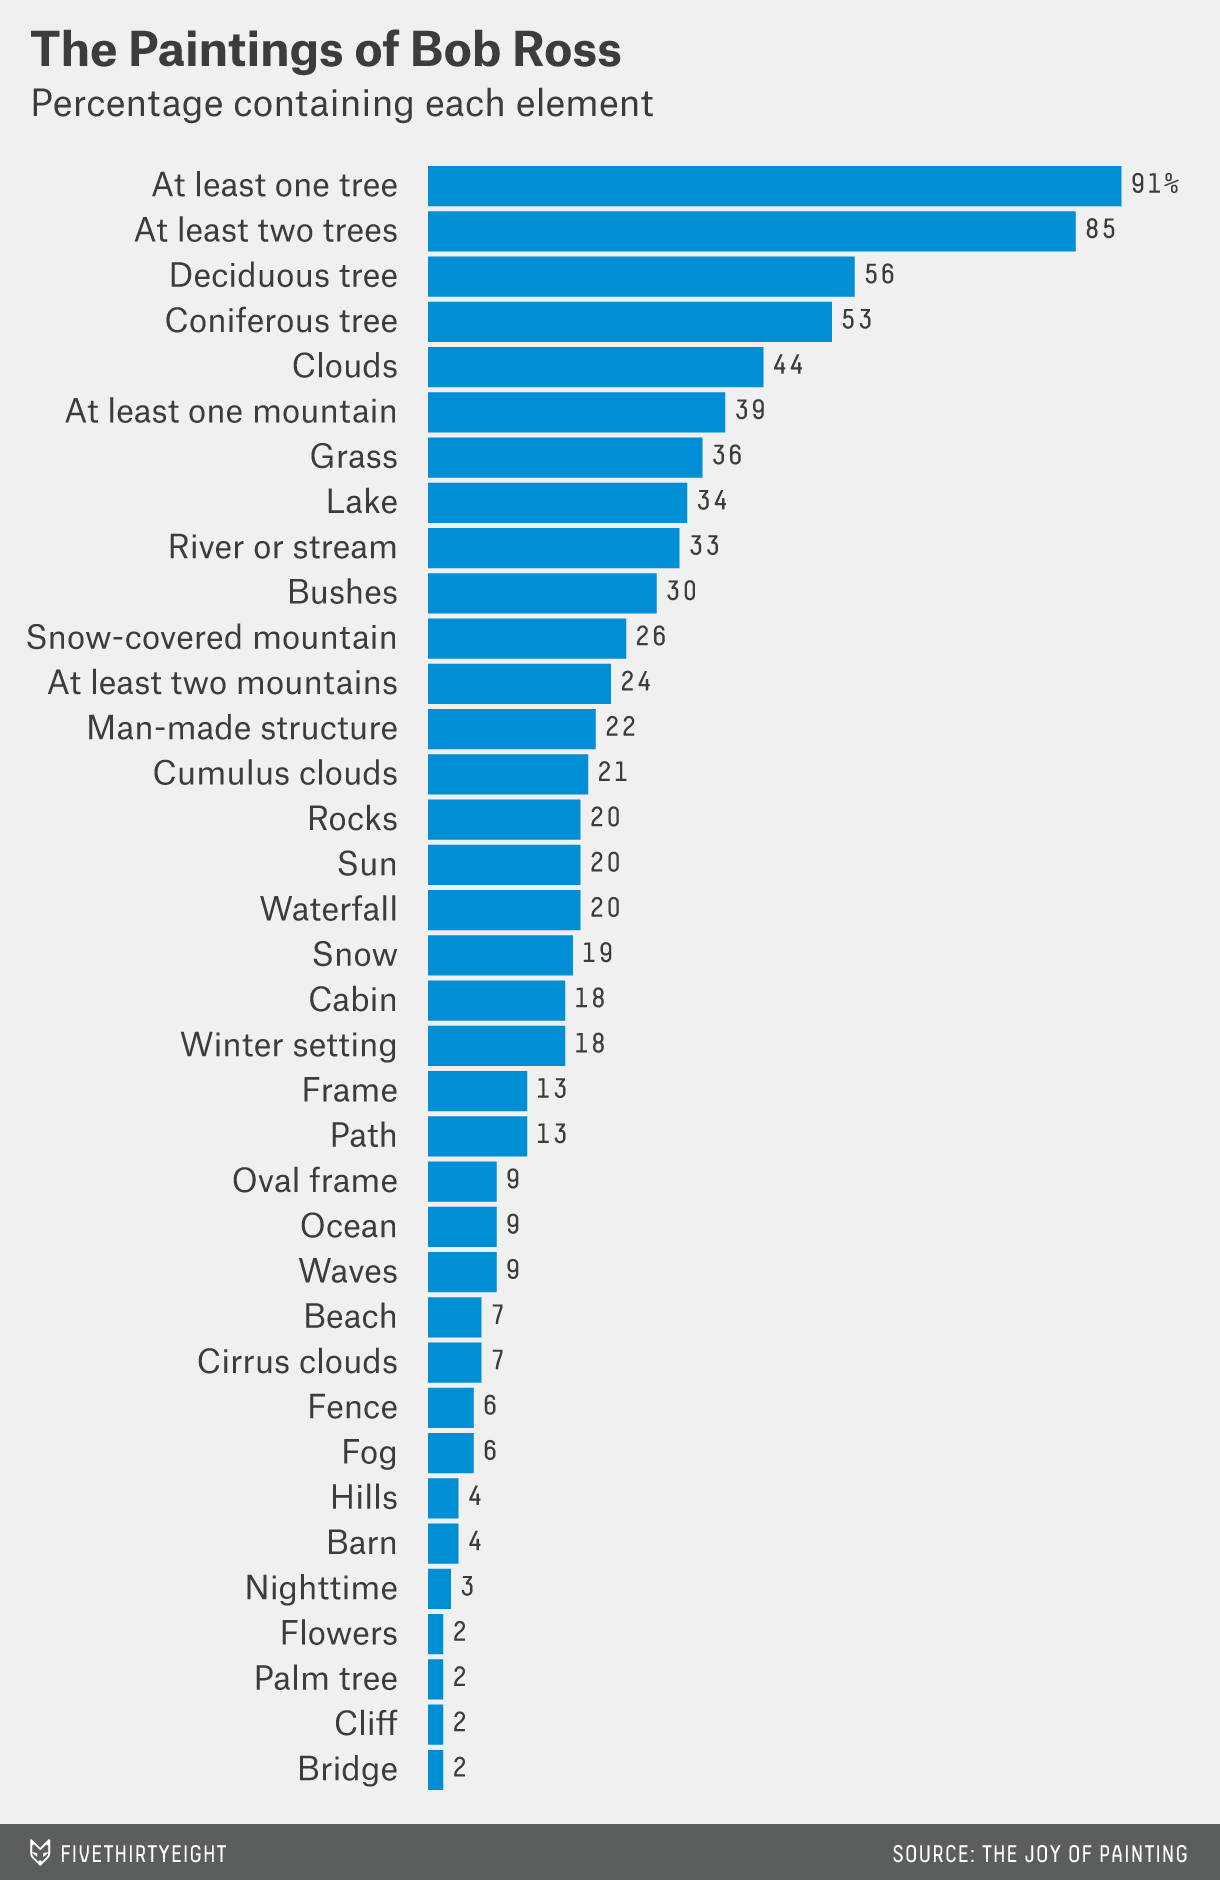

In [154]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-ross-tags-1.png'
example = Image(png, width=500)
display(example)

**Your answer here**

This data cannot be displayed as a pie chart as the sum of the data presented above is % figures. The data presented in a pie chart must add to 100%. Therefore presenting this data in pie will be incorrect. 

### Import the Titanic dataset.  

In [155]:
import pandas as pd

# Load the Titanic dataset from its URL:
Titanic = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Titanic/Titanic.csv')

Titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


What type of variable (quantitative, categorical, discrete, continuous, etc.) is Parents/Children_Aboard?  

Your answer here: Parents/Childred_Abroad data is a count of the number of associated people onboard with any person onboard Titanic. This way the passengers could be divided in groups only. However there will be no meaning of any descriptive statistics on the group data itself. For example there were 674 people that were travelling alone. To find an average of this figure compared with the number of people from other group will be illogical.
Therefore the data is simply categorical.

Create a visualization to show the distribution of Parents/Children_Aboard.

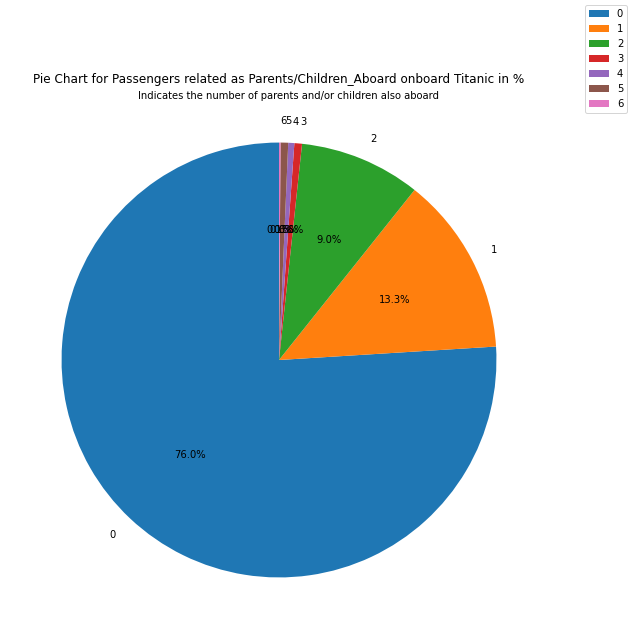

In [125]:
### YOUR CODE HERE ###
#Since the data is categorical I can display the data as a pie chart

import matplotlib.pyplot as plt

# First found the numbers in sizes by running a crosstab
pd.crosstab(Titanic['Parents/Children_Aboard'], columns='counts')

labels = 0,1,2,3,4,5,6
sizes = [674, 118, 80, 5, 4, 5, 1]
fig, ax = plt.subplots()
ax.pie(sizes, labels= labels, autopct='%1.1f%%', startangle=90)
fig.set_size_inches(10,10);
fig.legend()
plt.title('Pie Chart for Passengers related as Parents/Children_Aboard onboard Titanic in %')
plt.text(s='Indicates the number of parents and/or children also aboard', x = -.65, y = 1.2, fontsize = 10)
plt.show()

Describe the distribution of Parents/Children_Aboard.

From the pie chart it can be observed that the number of people travelling alone or unrelated were in the maximum number i.e. 76%. Then the next majority of people were that had a partner with them (can be assumed spouse or sibling) were approximately 13% of the passengers. Third major set were people that were a group of three (may be in a case of two parents and a child) at 9%. 

The other group of people were in small quantity but there were some groups of people that were travelling in a group of 4, 5, 6 and 7.